Please read the documentation for [transforms](https://pytorch.org/vision/0.12/transforms.html) and [CIFAR-10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) before starting your programming. 

## **Question 1**: Read the 'transform' documentation and describe as why we are adding the follwoing line:(10 Pts)
***'transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])'***

## **Question 2**: What is CIFAR10 dataset, input dimensions, output classes (labels) and size of dataset (10 Pts)

## **Question 3**: add your training/validation loss figure here and describe why you are encountering underfitting and overfitting issue (10 Pts)

## **Question 4**: update your model to address the underfit and overfit issue and add your new training/validation loss figure here (15 Pts)

## **Question 5**: update your DataLoader and entire code to incldue k-fold training, valiation, and testing (15 Pts)

## **Question 6**: change the learning rate to 0.5, 0.1, 0.01,0.001 and retrain the model, describe the result and attached each graph. (20 Pts) 

## **Question 7**: Define a new model call Net_2 wihtout hidden layer or activation function, what is your observation during training loop and why? (20)




# #Question 1: 
Ans: Defining the transformations that we need to be done on the images using **compose** as it composes several transforms together. 
For this line, 
1. ToTensor - is used to convert everything into an Image Tensor
2. Normalize - is used to normalize a tensor image with mean and standard deviation. Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) - that is mean=0.5, stddev=0.5 for all three channels

# #Question 2:
Ans: In the CIFAR-10 dataset,

1. Images are of size 32X32X3 (32X32 pixels and 3 colour channels namely RGB)
2. There are 10 output classes (labels) - airplane, automobile, bird, cat, deer,	dog, frog, horse, ship, truck
3. The dataset consists of 60000 with 6000 images per class. There are 50000 training images(this means we get 5000 images per class for training our NN) and 10000 test images.


# Training Neural Networks
In Assignment 3 Programming, you will train a neural network using PyTorch.  

This will walk through the entire process, from loading datasets, creating the network code and training it to classify the CIFAR-10 dataset.

In [1]:
# Import Prebuild Python Packages and Modules 
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt

## Loading and *Preprocessing* Data using DataLoader
you will load and preprocess our input and label data using methods from `datasets` and `transforms`.

Then, we will create `DataLoader`s for our train and validation test sets


In [2]:
# Establish our transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load train and test CIFAR10 datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
validation_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

# Create the training and test dataloaders with a batch size of 32
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


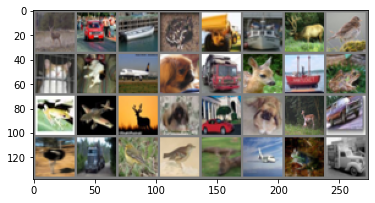

deer  car   ship  frog  truck ship  deer  bird  cat   cat   plane dog   truck deer  ship  frog  frog  plane deer  dog   car   dog   deer  car   bird  truck bird  bird  deer  plane frog  truck


In [5]:
import torchvision
train_loader.dataset
validation_loader.dataset

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Let us show some of the training images.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

## Defining your Neural Network
Now you are ready to define your model. Since you are using Deep Neural Network architecutre and your input image has three dimentions, first you need to flatten your input into a single input. 

Feel free to experiment here, and if you need additional help, consult the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html)

Add two hidden layers:
- hidden layer 1 = 120 neurons
- hiddel layer 2 = 84 neurons
- use relu ONLY at the end of both hidden layers 


In [9]:
# Define the class for your neural network in this cell
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        hidden_1 = 120
        hidden_2 = 84
        self.fc1 = nn.Linear(32 * 32 * 3, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        
    def forward(self, x):
        # Flatten images into vectors
        x = x.view(x.size(0), -1)
        # Apply layers & activation functions
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        return x

# Instantiate the model
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Optimizer and Loss function
Before you get into our training loop, you need to choose an optimizer and loss function for our network training. 

In [10]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function 
criterion = nn.CrossEntropyLoss()

## Creating the Training Loop
With you network, optimizer, and loss function, now you can begin the training step (uptimizing the weight values) 
Using the validation set to validate your accuracy, you can see when our network has given you the best fit and avoid overfit or underfit senarios.

In [11]:
num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

Epoch 1 training accuracy: 12.44% training loss: 1.77814
Epoch 1 validation accuracy: 14.56% validation loss: 1.64750
Epoch 2 training accuracy: 14.76% training loss: 1.59875
Epoch 2 validation accuracy: 14.81% validation loss: 1.60833
Epoch 3 training accuracy: 15.83% training loss: 1.51545
Epoch 3 validation accuracy: 14.95% validation loss: 1.57415
Epoch 4 training accuracy: 16.64% training loss: 1.45073
Epoch 4 validation accuracy: 15.79% validation loss: 1.54315
Epoch 5 training accuracy: 17.33% training loss: 1.39708
Epoch 5 validation accuracy: 15.59% validation loss: 1.54423
Epoch 6 training accuracy: 17.86% training loss: 1.35337
Epoch 6 validation accuracy: 15.65% validation loss: 1.57894
Epoch 7 training accuracy: 18.40% training loss: 1.31404
Epoch 7 validation accuracy: 15.91% validation loss: 1.55174
Epoch 8 training accuracy: 18.81% training loss: 1.27549
Epoch 8 validation accuracy: 15.53% validation loss: 1.56366
Epoch 9 training accuracy: 19.23% training loss: 1.24120

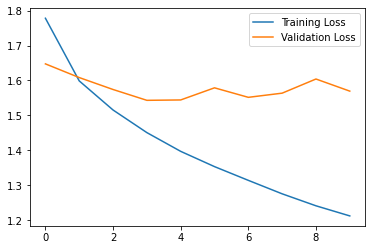

In [12]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()

# #Question 3:
Ans: In the above figure, we can observe that initially the losses of training as well as validation seems to decrease but after a certain point of time, although the loss of the training dataset keeps on decreasing but the loss of the validation set has started to increase. That is the point where we can state that the model has started to overfit.

# #Question 4: 

Ans: Now to prevent overfitting, dropout layers are added. A random number of neurons are disabled during data training. The value sent to neurons indicates the percentage of neurons that should be lost during an iteration, for my case it is 0.2 that means 20%. The weights of other neurons have less of an impact on the neurons after training. As a result, the model can generalize more effectively.

In [15]:
from torch.nn.modules import dropout
# Question 4: Updated code
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        hidden_1 = 120
        hidden_2 = 84
        self.fc1 = nn.Linear(32 * 32 * 3, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        #dropout layer (0.2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Flatten images into vectors
        x = x.view(x.size(0), -1)
        # Apply layers & activation functions
        x = F.relu(self.fc1(x))
        #add dropout layer
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        #add dropout layer
        x = self.dropout(x)
        #output layer
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [16]:
# Choose a loss function 
criterion = nn.CrossEntropyLoss()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [17]:
num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

Epoch 1 training accuracy: 11.90% training loss: 1.76219
Epoch 1 validation accuracy: 14.14% validation loss: 1.56769
Epoch 2 training accuracy: 13.66% training loss: 1.61498
Epoch 2 validation accuracy: 15.03% validation loss: 1.50394
Epoch 3 training accuracy: 14.33% training loss: 1.55580
Epoch 3 validation accuracy: 15.21% validation loss: 1.47649
Epoch 4 training accuracy: 14.85% training loss: 1.51112
Epoch 4 validation accuracy: 15.68% validation loss: 1.43997
Epoch 5 training accuracy: 15.27% training loss: 1.47371
Epoch 5 validation accuracy: 15.93% validation loss: 1.42676
Epoch 6 training accuracy: 15.73% training loss: 1.44114
Epoch 6 validation accuracy: 16.17% validation loss: 1.39837
Epoch 7 training accuracy: 15.84% training loss: 1.42053
Epoch 7 validation accuracy: 16.19% validation loss: 1.39921
Epoch 8 training accuracy: 16.16% training loss: 1.39690
Epoch 8 validation accuracy: 15.99% validation loss: 1.41099
Epoch 9 training accuracy: 16.24% training loss: 1.38420

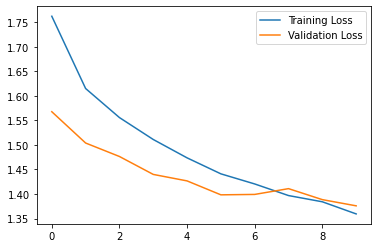

In [18]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()

# #Question 5: 
Ans: Updated DataLoader and entire code to include k-fold training, validation, and testing is below

Files already downloaded and verified
Files already downloaded and verified


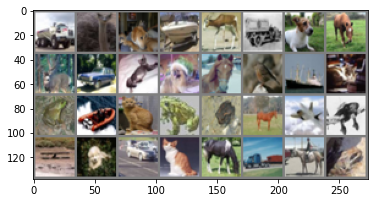

truck bird  dog   ship  deer  truck dog   horse deer  automobile cat   dog   horse bird  ship  cat   frog  ship  cat   frog  frog  horse airplane airplane airplane dog   automobile cat   horse truck horse frog 


In [19]:
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# Load train and test CIFAR10 datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
validation_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(training_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
validation_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Let us show some of the training images.
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

# #Question 6: Retrain the model for learning rate 0.5, 0.1, 0.01, 0.001 is below respectively

Net(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch 1 training accuracy: 3.15% training loss: 136.51626
Epoch 1 validation accuracy: 3.31% validation loss: 2.34899
Epoch 2 training accuracy: 3.25% training loss: 2.36352
Epoch 2 validation accuracy: 3.22% validation loss: 2.33178
Epoch 3 training accuracy: 3.27% training loss: 2.35922
Epoch 3 validation accuracy: 3.16% validation loss: 2.33743
Epoch 4 training accuracy: 3.21% training loss: 2.36380
Epoch 4 validation accuracy: 3.22% validation loss: 2.35307
Epoch 5 training accuracy: 3.25% training loss: 2.35851
Epoch 5 validation accuracy: 3.16% validation loss: 2.34713
Epoch 6 training accuracy: 3.22% training loss: 4.03494
Epoch 6 validation accuracy: 3.30% validation loss: 2.34873
Epoch 7 training accuracy: 3.27% training loss: 2.35573
Epoch 7 vali

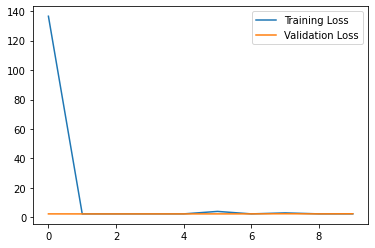

In [26]:
# Define the class for your neural network in this cell
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        hidden_1 = 120
        hidden_2 = 84
        self.fc1 = nn.Linear(32 * 32 * 3, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        #dropout layer (0.2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Flatten images into vectors
        x = x.view(x.size(0), -1)
        # Apply layers & activation functions
        x = F.relu(self.fc1(x))
        #add dropout layer
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        #add dropout layer
        x = self.dropout(x)
        #output layer
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
#print(net)

# Instantiate the model
net = Net()
print(net)

# Choose a loss function 
criterion = nn.CrossEntropyLoss()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.5)

num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()



Epoch 1 training accuracy: 3.22% training loss: 2.31544
Epoch 1 validation accuracy: 3.16% validation loss: 2.31128
Epoch 2 training accuracy: 3.19% training loss: 2.31501
Epoch 2 validation accuracy: 3.31% validation loss: 2.31470
Epoch 3 training accuracy: 3.12% training loss: 2.31532
Epoch 3 validation accuracy: 3.22% validation loss: 2.32519
Epoch 4 training accuracy: 3.16% training loss: 2.31601
Epoch 4 validation accuracy: 3.15% validation loss: 2.32128
Epoch 5 training accuracy: 3.18% training loss: 2.31535
Epoch 5 validation accuracy: 3.25% validation loss: 2.31170
Epoch 6 training accuracy: 3.12% training loss: 2.31663
Epoch 6 validation accuracy: 3.09% validation loss: 2.30870
Epoch 7 training accuracy: 3.33% training loss: 2.31491
Epoch 7 validation accuracy: 3.30% validation loss: 2.31288
Epoch 8 training accuracy: 3.13% training loss: 2.31524
Epoch 8 validation accuracy: 3.31% validation loss: 2.30932
Epoch 9 training accuracy: 3.08% training loss: 2.31516
Epoch 9 validati

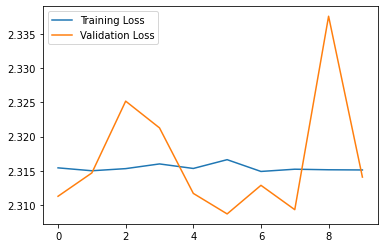

In [27]:
# Choose a loss function 
criterion = nn.CrossEntropyLoss()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.1)

num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()


Epoch 1 training accuracy: 3.17% training loss: 2.30419
Epoch 1 validation accuracy: 3.16% validation loss: 2.30350
Epoch 2 training accuracy: 3.22% training loss: 2.30419
Epoch 2 validation accuracy: 3.25% validation loss: 2.30317
Epoch 3 training accuracy: 3.25% training loss: 2.30386
Epoch 3 validation accuracy: 3.14% validation loss: 2.30408
Epoch 4 training accuracy: 3.16% training loss: 3.13829
Epoch 4 validation accuracy: 3.30% validation loss: 2.30334
Epoch 5 training accuracy: 3.11% training loss: 2.30419
Epoch 5 validation accuracy: 3.17% validation loss: 2.30402
Epoch 6 training accuracy: 3.11% training loss: 2.30421
Epoch 6 validation accuracy: 3.31% validation loss: 2.30288
Epoch 7 training accuracy: 3.18% training loss: 2.30393
Epoch 7 validation accuracy: 3.14% validation loss: 2.30400
Epoch 8 training accuracy: 3.22% training loss: 2.30389
Epoch 8 validation accuracy: 3.16% validation loss: 2.30531
Epoch 9 training accuracy: 3.17% training loss: 2.30396
Epoch 9 validati

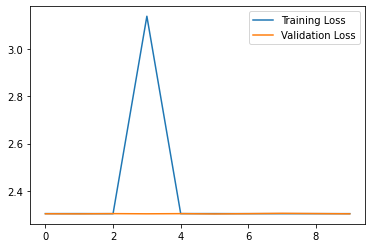

In [28]:
# Choose a loss function 
criterion = nn.CrossEntropyLoss()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.01)

num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()


Epoch 1 training accuracy: 3.14% training loss: 2.30287
Epoch 1 validation accuracy: 3.17% validation loss: 2.30276
Epoch 2 training accuracy: 3.14% training loss: 2.30278
Epoch 2 validation accuracy: 3.09% validation loss: 2.30284
Epoch 3 training accuracy: 3.07% training loss: 2.30279
Epoch 3 validation accuracy: 3.15% validation loss: 2.30272
Epoch 4 training accuracy: 3.13% training loss: 2.30278
Epoch 4 validation accuracy: 3.16% validation loss: 2.30271
Epoch 5 training accuracy: 3.15% training loss: 2.30277
Epoch 5 validation accuracy: 3.16% validation loss: 2.30271
Epoch 6 training accuracy: 3.20% training loss: 2.30274
Epoch 6 validation accuracy: 3.25% validation loss: 2.30266
Epoch 7 training accuracy: 3.13% training loss: 2.30278
Epoch 7 validation accuracy: 3.14% validation loss: 2.30277
Epoch 8 training accuracy: 3.15% training loss: 2.30276
Epoch 8 validation accuracy: 3.15% validation loss: 2.30266
Epoch 9 training accuracy: 3.18% training loss: 2.30277
Epoch 9 validati

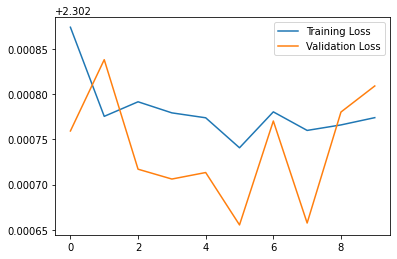

In [29]:
# Choose a loss function 
criterion = nn.CrossEntropyLoss()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()


# # Question 6 Explanation of all the results and graph for different Learning Rate: 
The learning rate influences how quickly or slowly we will approach the ideal weights. If the learning rate is very high, the ideal solution will be skipped and also a higher rate could result in a model that might not be able to predict anything accurately. As the learning rate is high (0.5), from the graph it seems a dying ReLU problem. As the results are in a dead state after a certain point. But after decreasing the learning rate to 0.1, 0.01 & last 0.001 we can observe the loss is decreasing as well, But A smaller learning rate will increase the risk of overfitting as we can see from the last graph for learning rate 0.001. So choosing an optimal learning rate is critical.

# #Question 7: Defining a new model call Net_2 wihtout hidden layer or activation function

Net(
  (fc1): Linear(in_features=3072, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch 1 training accuracy: 11.00% training loss: 1.92573
Epoch 1 validation accuracy: 10.89% validation loss: 1.89194
Epoch 2 training accuracy: 11.57% training loss: 1.88149
Epoch 2 validation accuracy: 11.54% validation loss: 1.84038
Epoch 3 training accuracy: 11.77% training loss: 1.87757
Epoch 3 validation accuracy: 10.93% validation loss: 1.87431
Epoch 4 training accuracy: 11.79% training loss: 1.87994
Epoch 4 validation accuracy: 11.60% validation loss: 1.84588
Epoch 5 training accuracy: 11.92% training loss: 1.87492
Epoch 5 validation accuracy: 11.85% validation loss: 1.84137
Epoch 6 training accuracy: 11.81% training loss: 1.87486
Epoch 6 validation accuracy: 11.87% validation loss: 1.87344
Epoch 7 training accuracy: 11.80% training loss: 1.87986
Epoch 7 validation accuracy: 11.51% validation loss: 1.84958
Epoch 8 training accuracy: 11.83% training loss: 1.88642
Epoch

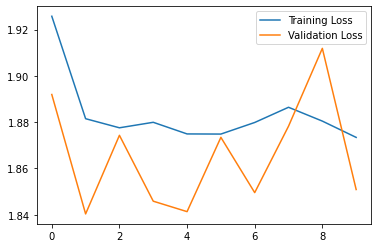

In [33]:
# Define the class for your neural network in this cell
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 10)
        #dropout layer (0.2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Flatten images into vectors
        x = x.view(x.size(0), -1)
        #add dropout layer
        x = self.dropout(x)
        #output layer
        x = self.fc1(x)
        return x

# Instantiate the model
net = Net()
#print(net)

# Instantiate the model
net = Net()
print(net)

# Choose a loss function 
criterion = nn.CrossEntropyLoss()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()



#Observation during training loop:
From the above as it is showing that the validation loss is much less than traing loss, that means the problem is **underfitting**. It occurs when we observe that the model’s training set loss is significantly larger than the validation loss of an ideal model. The output signal becomes a pure linear function in the absence of an activation function. As we all know, only single-grade polynomials in linear functions allow the neuron to serve as a **linear regression model**. We will always obtain a linear function as the result, regardless of how many linear functions we stack. DNN is also just linear regression if the hidden layer is removed. There is an activation function, of course, but if you apply its inverse function to your target set, it becomes essentially a linear regression. And this is the cause of the underfitting issue.